In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

# Step 1. Read in Metadata CSV

In [2]:
covid_metadata = pd.read_csv('metadata.csv')

In [3]:
covid_metadata.shape

(950, 30)

In [6]:
covid_metadata.head(5)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


## Step 2. Summarize the dataset

In [7]:
covid_metadata.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,697.000000,713.000000,78.000000,119.000000,16.000000,28.000000,40.000000
mean,9.083214,53.534362,38.898718,78.475630,5.024375,5.307143,4.638050
std,31.664077,16.949007,6.494383,38.742573,2.660341,3.489956,20.550033
min,-360.000000,18.000000,36.000000,20.000000,0.220000,0.000000,0.400000
25%,1.000000,40.000000,37.800000,55.000000,3.067500,2.725000,0.746500
50%,5.000000,54.000000,38.150000,85.000000,4.745000,4.800000,1.100000
75%,10.000000,68.000000,38.975000,95.000000,6.857500,6.925000,1.600000
max,365.000000,94.000000,95.000000,340.000000,11.200000,12.900000,131.000000


## Step 3. Examine labels for COVID and re-map if necessary

In [9]:
covid_metadata.finding.value_counts()

Pneumonia/Viral/COVID-19                   584
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
No Finding                                  22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Bacterial/Legionella              10
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Herpes                       3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fun

In [10]:
len(covid_metadata.patientid.unique())

472

In [11]:
covid_metadata.loc[covid_metadata['finding'] == "Pneumonia/Viral/COVID-19", 'is_covid'] = 1
covid_metadata.loc[covid_metadata['finding'] != "Pneumonia/Viral/COVID-19", 'is_covid'] = 0

In [12]:
covid_metadata.is_covid.value_counts()

1.0    584
0.0    366
Name: is_covid, dtype: int64

## Step 4. Examine unique patient records (de-dupe rows with multiple images per patient)

In [13]:
unique_cases = covid_metadata.drop_duplicates(subset='patientid')

In [14]:
unique_cases.shape

(472, 31)

In [15]:
unique_cases

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29,is_covid
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN,1.0
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN,1.0
6,5,NaN,NaN,NaN,Pneumonia,NaN,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2017,NaN,images,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,CC BY-SA,Severe ARDS. Person is intubated with an OG in...,NaN,NaN,0.0
7,6,0.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN,1.0
9,3,4.0,M,74.0,Pneumonia/Viral/SARS,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,AP,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,477,7.0,F,60.0,Pneumonia/Bacterial/Legionella,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP,X-ray,NaN,United Kingdom,images,bdc40f9ad2395d88c92479089f5d1b_jumbo-10.jpeg,NaN,https://radiopaedia.org/cases/legionella-pneum...,CC BY-NC-SA,"Unwell. Low saturations. Pyrexic. Tachypneic, ...","Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN,0.0
943,478,NaN,F,75.0,No Finding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP,X-ray,NaN,Hungary,images,02b973e10caa192fd4e6825ad4aeaf_jumbo-10.jpeg,NaN,https://radiopaedia.org/cases/right-middle-lob...,CC BY-NC-SA,"Decreased SpO2, elevated CRP and WBC, diffuse ...","Case courtesy of Dr Balint Botz , Radiopaedia....",NaN,0.0
945,479,0.0,F,40.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AP,X-ray,NaN,United Kingdom,images,072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg,NaN,https://radiopaedia.org/cases/multifocal-round...,CC BY-NC-SA,Asthmatic. Shortness of breath and wheeze. Rou...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN,0.0
947,480,NaN,M,26.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,NaN,NaN,images,000001-266.jpg,NaN,https://www.eurorad.org/case/947,CC BY-NC-SA 4.0,fire-eater accidentally ingested a paraffin mi...,NaN,NaN,0.0


## Step 5. Gender distribution of dataset, breakdown by COVID incidence

<AxesSubplot:>

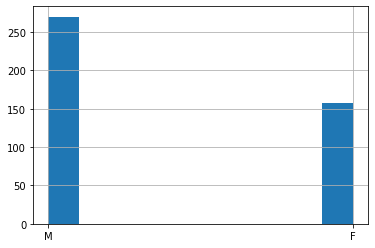

In [61]:
unique_cases.sex.hist()

<AxesSubplot:ylabel='sex,is_covid'>

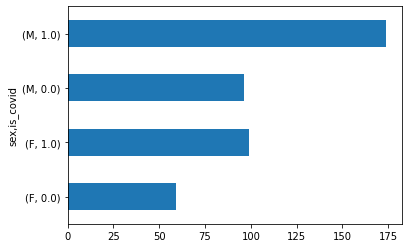

In [26]:
unique_cases.groupby(['sex', 'is_covid']).size().plot(kind='barh') 

## Step 6. Age distribution, breakdown by COVID incidence

<AxesSubplot:>

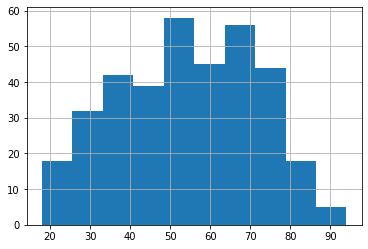

In [29]:
unique_cases.age.hist()

array([<AxesSubplot:title={'center':'0.0'}>,
       <AxesSubplot:title={'center':'1.0'}>], dtype=object)

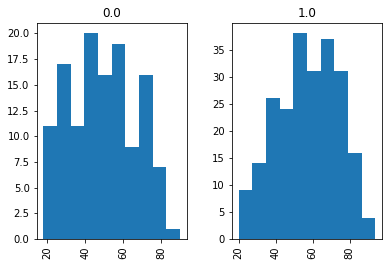

In [33]:
unique_cases['age'].hist(by=unique_cases['is_covid'])

array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>]], dtype=object)

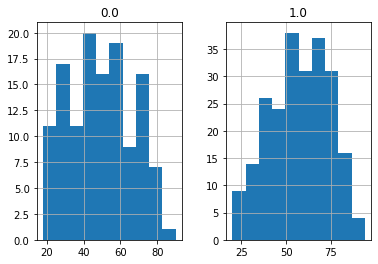

In [38]:
unique_cases.reset_index().pivot('index','is_covid','age').hist()

<AxesSubplot:xlabel='is_covid'>

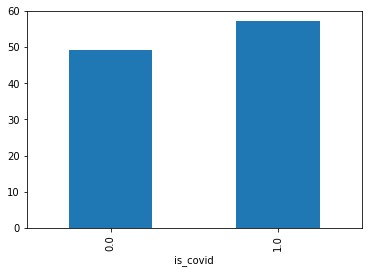

In [32]:
unique_cases.groupby('is_covid')['age'].mean().plot(kind='bar')

## Step 7. Offset (number of days it took to present at hospital), breakdown by COVID incidence

<AxesSubplot:xlabel='is_covid'>

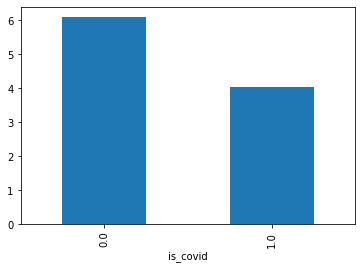

In [39]:
unique_cases.groupby('is_covid')['offset'].mean().plot(kind='bar')

## Step 8. Survival distribution, breakdown by COVID

In [40]:
unique_cases.survival.value_counts()

Y    109
N     26
Name: survival, dtype: int64

<AxesSubplot:xlabel='is_covid', ylabel='count'>

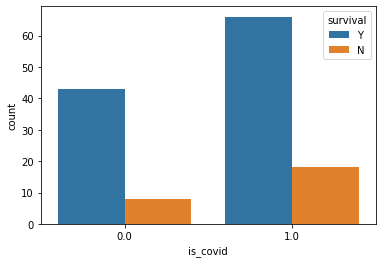

In [43]:
sns.countplot(data=unique_cases,x='is_covid',hue='survival')

## Step 9. Location of cases

In [49]:
unique_cases.location.value_counts()

Hannover Medical School, Hannover, Germany                                         71
Italy                                                                              51
Melbourne, Australia                                                               27
United Kingdom                                                                     13
Hong Kong                                                                          12
Wenzhou, China                                                                     10
Spain                                                                               8
Brescia, Italy                                                                      7
Humanitas Clinical and Research Hospital, Rozzano, Milan, Italy                     6
Nottingham, United Kingdom                                                          6
Wuhan, China                                                                        5
Mount Sinai Hospital, Toronto, Ontario, Canada        

## Step 10. Peek at clinical notes

In [58]:
unique_cases.clinical_notes.sample()

924    Shortness of breath, fever and rigors Opacity projected behind the heart on the PA radiograph with loss of visualization of the left hemidiaphragm consistent with collapse / consolidation throughout the left lower lobe.  Small focus of linear atelectasis in the left costophrenic recess region.  Right lung and pleural space are clear.  Normal cardiomediastinal contour.  Cholecystectomy clips noted. Typical chest radiograph appearance of left lower lobe pneumonia with collapse / consolidation.
Name: clinical_notes, dtype: object

## Next Steps: Image analysis

In [62]:
covid_metadata.view.value_counts()

PA           344
AP Supine    234
AP           203
L             84
Axial         68
Coronal       16
AP Erect       1
Name: view, dtype: int64